# 0. Web Crawler

In [2]:
import requests
from bs4 import BeautifulSoup

In [2]:
base_url = 'https://weibo.com/liuxiaolingtong'

In [3]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.26 Safari/537.36 Core/1.63.6788.400 QQBrowser/10.3.2727.400'}

In [4]:
response = requests.get(base_url, headers=headers)

In [5]:
response.status_code

200

In [11]:
response.encoding = 'gbk'

In [12]:
response.text

'<!DOCTYPE html>\n<html>\n<head>\n    <meta http-equiv="Content-type" content="text/html; charset=gb2312"/>\n    <title>Sina Visitor System</title>\n</head>\n<body>\n<span id="message"></span>\n<script type="text/javascript" src="/js/visitor/mini_original.js?v=20161116"></script>\n<script type="text/javascript">\n    window.use_fp = "1" == "1"; // ÊòØÂê¶ÈááÈõÜËÆæÂ§áÊåáÁ∫π„ÄÇ\n    var url = url || {};\n    (function () {\n        this.l = function (u, c) {\n            try {\n                var s = document.createElement("script");\n                s.type = "text/javascript";\n                s[document.all ? "onreadystatechange" : "onload"] = function () {\n\n                    if (document.all && this.readyState != "loaded" && this.readyState != "complete") {\n                        return\n                    }\n                    this[document.all ? "onreadystatechange" : "onload"] = null;\n                    this.parentNode.removeChild(this);\n                    if (c) {\n   

## Selenium

In [13]:
from selenium import webdriver

In [14]:
chrome_options = webdriver.ChromeOptions()
chrome_options.headless = False

In [15]:
driver = webdriver.Chrome(executable_path='G:\Code Python\Data Science\chromedriver.exe', 
                          options=chrome_options)

In [20]:
driver.get(base_url + '?is_all=1')

In [21]:
driver.current_url

'https://weibo.com/liuxiaolingtong?is_all=1'

In [22]:
html_doc = driver.page_source

In [23]:
soup = BeautifulSoup(html_doc, 'html5lib')

In [24]:
feeds = soup.find_all(class_='WB_feed_detail')

In [25]:
len(feeds)

15

In [27]:
feeds[0]

<div class="WB_feed_detail clearfix" node-type="feed_content" style="background-image:url(//img.t.sinajs.cn/t6/skin/public/feed_cover/star_057_pc_x2.png?version=a105422888305dba)">
        
            <div class="WB_starcover">
                            <a action-data="id=star_057&amp;isvip=0" action-type="fl_cardCover" href="javascript:void(0)" suda-uatrack="key=vip_background&amp;value=feed_background_click"></a>
                        </div>
                        <div class="WB_screen W_fr" node-type="fl_screen_box">
    <div class="screen_box"><a action-type="fl_menu" href="javascript:void(0);"><i class="W_ficon ficon_arrow_down S_ficon">c</i></a>
        <div class="layer_menu_list" node-type="fl_menu_right" style="display: none; position: absolute; z-index: 999;">
            <ul>
                                                                                <li><a action-data="width=660&amp;height=556&amp;mid=4307621101621245&amp;src=%2F%2Fpromote.vip.weibo.com%2Fpromotea

## Mobile

In [28]:
mobile_url = 'https://m.weibo.cn/u/1211441627'

In [29]:
driver.get(mobile_url)

In [30]:
html_doc = driver.page_source

In [31]:
soup = BeautifulSoup(html_doc, 'lxml')

In [32]:
len(soup.find_all(class_='card', attrs='m-panel'))

14

In [33]:
js_load_page = '''
xmlhttp = new XMLHttpRequest();
xmlhttp.open("GET","https://m.weibo.cn/api/container/getIndex?type=uid&value=1211441627&containerid=1076031211441627&page=3",true);
xmlhttp.setRequestHeader("Accept", "application/json, text/plain, */*");
xmlhttp.setRequestHeader("MWeibo-Pwa", "1");
xmlhttp.setRequestHeader("X-Requested-With", "XMLHttpRequest");
xmlhttp.send(null);
'''

In [35]:
driver.execute_script(script=js_load_page)

## Mobile + XHR + JSON

In [5]:
xhr_url = 'https://m.weibo.cn/api/container/getIndex'

params = {'type':'uid',
          'value':'1211441627',
          'containerid':'1076031211441627',
          'page':1}

In [6]:
response = requests.get(xhr_url, params=params)

In [7]:
feed_dict = response.json()

In [8]:
feed_dict

{'ok': 1,
 'data': {'cardlistInfo': {'containerid': '1076031211441627',
   'v_p': 42,
   'show_style': 1,
   'total': 5981,
   'page': 2},
  'cards': [{'card_type': 9,
    'itemid': '1076031211441627_-_4309109417936394',
    'scheme': 'https://m.weibo.cn/status/H3OYBxiCm?mblogid=H3OYBxiCm&luicode=10000011&lfid=1076031211441627',
    'mblog': {'created_at': '6Â∞èÊó∂Ââç',
     'id': '4309109417936394',
     'idstr': '4309109417936394',
     'mid': '4309109417936394',
     'can_edit': False,
     'show_additional_indication': 0,
     'text': '<a href=\'/n/ÁéØÁêÉÁΩë\'>@ÁéØÁêÉÁΩë</a> <span class="url-icon"><img alt="[ËÄ∂]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_ye-4ef8705b08.png" style="width:1em; height:1em;"/></span>Êàë‰ª¨ÊúâÂπ∏Ëµ∂‰∏ä‰∫ÜÂ•ΩÊó∂‰ª£„ÄÅÊñ∞Êó∂‰ª£ÔºåË°∑ÂøÉÂú∞ÊÑüË∞¢ËßÇ‰ºóÊúãÂèã‰ª¨Â§öÂπ¥ÁöÑÊîØÊåÅ‰∏éÂÖ≥Ê≥®<span class="url-icon"><img alt="[good]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_good-55854d01bb.png" style="width:1em; height:1em;"/></span><span class="url-icon"><

In [10]:
sample_feed = feed_dict['data']['cards'][2]

In [11]:
sample_feed['mblog']['text']

'Ëá™ÂèñÂÖ∂Ëæ±'

In [16]:
from tqdm import tqdm_notebook
import time

In [45]:
posts = []

In [48]:
for page in tqdm_notebook(range(1, 1000)):
    params['page'] = page
    response = requests.get(xhr_url, params=params)
    feed_dict = response.json()
    print("\n>>>> PAGE: {} <<<<".format(page))
    if feed_dict['ok'] == 1:
        # ÂΩìÈ°µÂæÆÂçöÊï∞
        nb_blogs = len(feed_dict['data']['cards'])
        for i in range(nb_blogs):
            # ÊôÆÈÄöÂæÆÂçö
            if feed_dict['data']['cards'][i]['card_type'] == 9:
                mblog = feed_dict['data']['cards'][i]['mblog']
                mblog_id = mblog['id']
                date = mblog['created_at']
                text = mblog['text']
                device = mblog['source']
                reposts_count = mblog['reposts_count']
                comments_count = mblog['comments_count']
                attitudes_count = mblog['attitudes_count']
                print(">>>> {} {}<<<<".format(date, text[:30]))
                posts.append([mblog_id, date, text, reposts_count, comments_count, attitudes_count])
        time.sleep(1)
    else:
        break


>>>> PAGE: 1 <<<<
>>>> 6Â∞èÊó∂Ââç <a href='/n/ÁéØÁêÉÁΩë'>@ÁéØÁêÉÁΩë</a> <spa<<<<
>>>> 23Â∞èÊó∂Ââç Ëá™ÂèñÂÖ∂Ëæ±<<<<
>>>> 11-20 Â≠¶ÁÖßÁõ∏ÔºöÂåó‰∫¨ÂçÅÈáåÊ≤≥ÊñáÂåñË°óÊ∞ë‰øóÈìúÁªÑÂÉè<span class="<<<<
>>>> 11-20 ‰ªäÂ§©ÊòØ <a  href="https://m.weibo.<<<<
>>>> 11-19 ‰ªäÂ§©ÔºàÂÜúÂéÜÂçÅÊúàÂçÅ‰∫åÔºâÂú®Á¶èÂª∫„ÄÅÂπø‰∏úÁ≠â‰∏çÂ∞ëÁúÅÂ∏ÇÂèäÂú∞Âå∫ËÆ§‰∏∫ÊòØÈΩêÂ§©Â§ß<<<<
>>>> 11-18 üá®üá≥‰∏≠ÂõΩÔºå‰∏ÄÁÇπÈÉΩ‰∏çËÉΩÂ∞ëÔºÅ<<<<
>>>> 11-18 Ëé∑ÊèêÂêçÂ∑≤‰∏çÊï¢ÂΩì üôè<span class="url-icon<<<<
>>>> 11-17 <a href='/n/‰∫∫Ê∞ëÁΩë'>@‰∫∫Ê∞ëÁΩë</a> Ôºö„ÄäÂ§ßÂú£<<<<
>>>> 11-17 1961Âπ¥ÁöÑ‰ªäÂ§©ÔºåÊØõÊ≥Ω‰∏ú‰∏ªÂ∏≠Âú®10Êúà10Êó•Áúã‰∫ÜÁî±ÊµôÊ±üÁªçÂâßÂõ¢(<<<<
>>>> 11-15 <span class="url-icon"><img al<<<<


# 1. Data Clearning

In [3]:
import numpy as np
import pandas as pd

In [146]:
mblog_df_new = pd.DataFrame(posts)

In [182]:
mblog_df_new

id   date                                               text  \
0  4309109417936394   6Â∞èÊó∂Ââç  <a href='/n/ÁéØÁêÉÁΩë'>@ÁéØÁêÉÁΩë</a> <span class="url-ico...   
1  4308866047023540  23Â∞èÊó∂Ââç                                               Ëá™ÂèñÂÖ∂Ëæ±   
2  4308437510888238  11-20  Â≠¶ÁÖßÁõ∏ÔºöÂåó‰∫¨ÂçÅÈáåÊ≤≥ÊñáÂåñË°óÊ∞ë‰øóÈìúÁªÑÂÉè<span class="url-icon"><img a...   
3  4308345349150815  11-20  ‰ªäÂ§©ÊòØ <a  href="https://m.weibo.cn/search?contai...   
4  4307983288013944  11-19  ‰ªäÂ§©ÔºàÂÜúÂéÜÂçÅÊúàÂçÅ‰∫åÔºâÂú®Á¶èÂª∫„ÄÅÂπø‰∏úÁ≠â‰∏çÂ∞ëÁúÅÂ∏ÇÂèäÂú∞Âå∫ËÆ§‰∏∫ÊòØÈΩêÂ§©Â§ßÂú£ÁöÑËØûÁîüÊó•ÔºåÊØèÂπ¥ÈÉΩ‰ºöÂú®ËøôÂ§©‰∏æË°åÈöÜ...   
5  4307688097481835  11-18                                       üá®üá≥‰∏≠ÂõΩÔºå‰∏ÄÁÇπÈÉΩ‰∏çËÉΩÂ∞ëÔºÅ   
6  4307621101621245  11-18  Ëé∑ÊèêÂêçÂ∑≤‰∏çÊï¢ÂΩì üôè<span class="url-icon"><img alt="[Êè°Êâã]...   
7  4307296432985214  11-17  <a href='/n/‰∫∫Ê∞ëÁΩë'>@‰∫∫Ê∞ëÁΩë</a> Ôºö„ÄäÂ§ßÂú£ËΩÆÂõû‰πãÂ§ßÈóπÂ§©ÂÆ´„ÄãÂÖ®Êñ∞ÂÆ£‰º†ÁâáÂç≥Â∞ÜÁôª...   
8  4307261847968774  11-17  1961Âπ¥ÁöÑ‰ªäÂ§©ÔºåÊØõÊ≥Ω‰∏ú‰∏ªÂ∏≠Âú®10Êúà10Êó•Áúã‰∫ÜÁî±ÊµôÊ±üÁªçÂâßÂõ¢(Áà∂‰∫≤ÂÖ≠ÈæÑÁ´•„ÄÅ‰ºØÁà∂‰∏ÉÈæÑÁ´•„ÄÅ‰∫åÂì•Â∞èÂÖ≠...   
9  4306722635820150  11-15  <span class="url-icon"><img alt="[‰ΩúÊèñ]" src="//...   

   reposts  comments   like  
0      130         0   1936  
1      165         0   3522  
2      116         0   2723  
3      199         0   4306  
4      172         0   3335  
5      233         0   9292  
6      446         0  12722  
7      317         0   2273  
8      136         0   3301  
9      129         1   2386

In [159]:
#mblog_df = pd.DataFrame(posts)
mblog_df_new.columns = ['id', 'date', 'text', 'reposts', 'comments', 'like']

In [168]:
mblog_df = pd.concat([mblog_df_new, mblog_df], sort=False)

In [207]:
mblog_df

id       date  \
0     4309109417936394 2018-11-22   
1     4308866047023540 2018-11-22   
2     4308437510888238 2018-11-20   
3     4308345349150815 2018-11-20   
4     4307983288013944 2018-11-19   
5     4307688097481835 2018-11-18   
6     4307621101621245 2018-11-18   
7     4307296432985214 2018-11-17   
8     4307261847968774 2018-11-17   
9     4306722635820150 2018-11-15   
0          4.30631e+15 2018-11-14   
1          4.30635e+15 2018-11-14   
2           4.3063e+15 2018-11-14   
3          4.30567e+15 2018-11-12   
4          4.30564e+15 2018-11-12   
5          4.30559e+15 2018-11-12   
6          4.30553e+15 2018-11-12   
7          4.30511e+15 2018-11-11   
8          4.30477e+15 2018-11-10   
9          4.30455e+15 2018-11-09   
10         4.30408e+15 2018-11-08   
11           4.304e+15 2018-11-08   
12         4.30375e+15 2018-11-07   
13         4.30369e+15 2018-11-07   
14         4.30329e+15 2018-11-06   
15         4.30297e+15 2018-11-05   
16         4.30272e+15 2018-11-04   
17         4.30264e+15 2018-11-04   
18          4.3022e+15 2018-11-03   
19         4.30199e+15 2018-11-02   
...                ...        ...   
5695        1.1001e+12 2010-01-01   
5696        1.1001e+12 2010-01-01   
5697       1.09123e+13 2009-12-30   
5698       1.09123e+13 2009-12-30   
5699       1.09123e+13 2009-12-29   
5700       1.09123e+13 2009-12-29   
5701       1.09123e+13 2009-12-29   
5702       1.09123e+13 2009-12-29   
5703       1.09123e+13 2009-12-27   
5704       1.09123e+13 2009-12-27   
5705       1.09123e+13 2009-12-26   
5706       1.09123e+13 2009-12-26   
5707       1.09122e+13 2009-12-24   
5708       1.09122e+13 2009-12-24   
5709       1.09122e+13 2009-12-19   
5710       1.09122e+12 2009-12-19   
5711       1.09122e+12 2009-12-17   
5712       1.09122e+12 2009-12-17   
5713       1.09122e+13 2009-12-15   
5714       1.09121e+13 2009-12-14   
5715       1.09121e+13 2009-12-14   
5716       1.09121e+13 2009-12-13   
5717       1.09121e+13 2009-12-12   
5718       1.09121e+13 2009-12-11   
5719       1.09121e+13 2009-12-06   
5720       1.09121e+13 2009-12-05   
5721       1.09121e+12 2009-12-05   
5722       1.09121e+12 2009-12-05   
5723       1.09121e+12 2009-12-05   
5724        1.0912e+12 2009-12-04   

                                                   text  reposts  comments  \
0     <a href='/n/ÁéØÁêÉÁΩë'>@ÁéØÁêÉÁΩë</a> <span class="url-ico...      130         0   
1                                                  Ëá™ÂèñÂÖ∂Ëæ±      165         0   
2     Â≠¶ÁÖßÁõ∏ÔºöÂåó‰∫¨ÂçÅÈáåÊ≤≥ÊñáÂåñË°óÊ∞ë‰øóÈìúÁªÑÂÉè<span class="url-icon"><img a...      116         0   
3     ‰ªäÂ§©ÊòØ <a  href="https://m.weibo.cn/search?contai...      199         0   
4     ‰ªäÂ§©ÔºàÂÜúÂéÜÂçÅÊúàÂçÅ‰∫åÔºâÂú®Á¶èÂª∫„ÄÅÂπø‰∏úÁ≠â‰∏çÂ∞ëÁúÅÂ∏ÇÂèäÂú∞Âå∫ËÆ§‰∏∫ÊòØÈΩêÂ§©Â§ßÂú£ÁöÑËØûÁîüÊó•ÔºåÊØèÂπ¥ÈÉΩ‰ºöÂú®ËøôÂ§©‰∏æË°åÈöÜ...      172         0   
5                                          üá®üá≥‰∏≠ÂõΩÔºå‰∏ÄÁÇπÈÉΩ‰∏çËÉΩÂ∞ëÔºÅ      233         0   
6     Ëé∑ÊèêÂêçÂ∑≤‰∏çÊï¢ÂΩì üôè<span class="url-icon"><img alt="[Êè°Êâã]...      446         0   
7     <a href='/n/‰∫∫Ê∞ëÁΩë'>@‰∫∫Ê∞ëÁΩë</a> Ôºö„ÄäÂ§ßÂú£ËΩÆÂõû‰πãÂ§ßÈóπÂ§©ÂÆ´„ÄãÂÖ®Êñ∞ÂÆ£‰º†ÁâáÂç≥Â∞ÜÁôª...      317         0   
8     1961Âπ¥ÁöÑ‰ªäÂ§©ÔºåÊØõÊ≥Ω‰∏ú‰∏ªÂ∏≠Âú®10Êúà10Êó•Áúã‰∫ÜÁî±ÊµôÊ±üÁªçÂâßÂõ¢(Áà∂‰∫≤ÂÖ≠ÈæÑÁ´•„ÄÅ‰ºØÁà∂‰∏ÉÈæÑÁ´•„ÄÅ‰∫åÂì•Â∞èÂÖ≠...      136         0   
9     <span class="url-icon"><img alt="[‰ΩúÊèñ]" src="//...      129         1   
0     <a href='/n/‰∫∫Ê∞ëÁΩø>@‰∫∫Ê∞ëÁΩø/a> <span class="url-icon"...       98         0   
1     ‰∏∫ÊàëÁöÑÊØçÊ†°ÔºöÊµôÊ±üÁªçÂÖ¥Â∏ÇÁ¨¨‰∏ÄÂàùÁ∫ß‰∏≠Â≠¶ÁöÑÂ∞èÂ≠¶Â¶πÁöÑ‰π¶Ê≥ïÁÇπËµøspan class="url-icon...       47         0   
2     Êàë‰ª¨ÂèñÁªèÂõûÊù•‰∫ÜÔºÅ„ÄäÊï¢ÈóÆË∑ØÂú®‰ΩïÊñπ„ÄãÔºüË∑ØÂú®ËÑö‰∏ãÔºøspan class="url-icon"><i...      232         0   
3     <span class="url-icon"><img alt="[good]" src="...      128         0   
4     Ê≤≥ÂåóÊñ∞ÈóªÁΩøspan class="url-icon"><img alt="[good]" s...       92         0   
5     ‰ªéÂ≠ôÊÇüÁ©∫Âà∞ÁéÑÂ•òÂ§ß

In [173]:
def complete_date(date):
    if len(date) < 6:
        return '2018-' + date
    else:
        return date

In [174]:
mblog_df['date'][:2] = '11-22'

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
mblog_df['date'][:10] = mblog_df['date'][:10].apply(complete_date)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [179]:
mblog_df['date'] = pd.to_datetime(mblog_df['date'])

In [166]:
mblog_df = pd.read_csv('six_little_child_weibo_181115.csv', index_col=None, encoding='ANSI')

In [181]:
mblog_df.to_csv('six_little_child_weibo_181122.csv', index=False, encoding='utf-8')

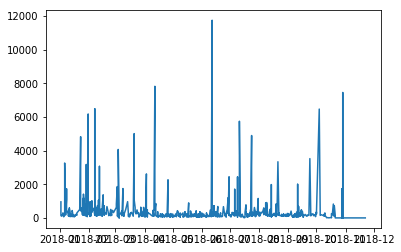

In [199]:
plt.plot(mblog_df_2018['date'], mblog_df_2018['comments'])

In [198]:
mblog_df_2018 = mblog_df[mblog_df['date'] > pd.to_datetime('2018', yearfirst=True)]

In [194]:
pd.to_datetime('2017', yearfirst=True)

Timestamp('2017-01-01 00:00:00')

# 2. @

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
soup = BeautifulSoup(mblog_df.iloc[0]['text'], 'html.parser')

In [201]:
soup

<a href="/n/ÁéØÁêÉÁΩë">@ÁéØÁêÉÁΩë</a> <span class="url-icon"><img alt="[ËÄ∂]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_ye-4ef8705b08.png" style="width:1em; height:1em;"/></span>Êàë‰ª¨ÊúâÂπ∏Ëµ∂‰∏ä‰∫ÜÂ•ΩÊó∂‰ª£„ÄÅÊñ∞Êó∂‰ª£ÔºåË°∑ÂøÉÂú∞ÊÑüË∞¢ËßÇ‰ºóÊúãÂèã‰ª¨Â§öÂπ¥ÁöÑÊîØÊåÅ‰∏éÂÖ≥Ê≥®<span class="url-icon"><img alt="[good]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_good-55854d01bb.png" style="width:1em; height:1em;"/></span><span class="url-icon"><img alt="[‰ΩúÊèñ]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_zuoyi-38716bd05f.png" style="width:1em; height:1em;"/></span>üôè 

In [209]:
at_dict = {}

In [205]:
def get_at(text):
    at_list = []
    soup = BeautifulSoup(text, 'lxml')
    
    # Â¶ÇÊûúÊú¨Êù°ÂæÆÂçöÂÜÖÊúâÂ§ñÈìæ
    if soup.find_all('a'):
        # ÈÅçÂéÜÂ§ñÈìæ
        for a in soup.find_all('a'):
            # ÊòØÂê¶‰∏∫@
            if '@' in a.text:
                at_user = a.text[1:]
                at_list.append(at_user)
            
                if at_user in at_dict:
                    at_dict[at_user] += 1
                else:
                    at_dict[at_user] = 1
                
    return at_list

In [210]:
mblog_df['at'] = mblog_df['text'].apply(get_at)

In [215]:
at_series = pd.Series(at_dict, index=at_dict.keys())

In [218]:
at_series.sort_values(ascending=False)

ÂÑíÊÑèÂΩ±‰∏ö             301
Ë¥∞Èõ∂Â£πÈôÜÂΩ±ËßÜ‰º†Â™í         280
Ë°åËµ∞ÁöÑÁ¶ÖÊñáÂåñ           266
ÂÖâÂΩ±ÂÖàÁîü1981         150
ÂÖ≠Â∞èÈæÑÁ´•Âõæ‰π¶Á≠æÂêçÂ∫ø/a>      39
Ëë£Ëë£Dora            31
Âåó‰∫¨Âç´ËßÜ              31
È∫¶‰∏πÂΩ±ËßÜ‰∏äÊµ∑ÊúâÈôêÂÖ¨Âè∏        29
ËøüÈáçÁëø-‰∫∫ÁîüÂè™ÂÅö‰∏Ä‰∫ãÂèà‰ΩïÂ¶®     27
cctv4‰∏≠ÂõΩÊñáËâ∫         26
ÈïøÊ±üÊñáËâ∫Âåó‰∫¨‰∏≠ÂøÉ          24
Â§ßÂú£ËΩ¶ÊúçÂÆòÂæÆ            24
ÈïøÊ±üÊñáËâ∫Âá∫ÁâàÁ§ø/a>        24
ÁîµÂΩ±Ë¥¢Ëø∑ÂÆòÂæÆ            23
Ê±™Á≤§_               23
‰øäË∂ÖcharlieË•ø‰∏âÊ∞¥Á¥Ö     23
Ê≤ôÂíåÂ∞öÂàòÂ§ßÂàö            23
ÈôàÈæô                23
‰∫ëÂçóÂ∏àËåÉÂ§ßÂ≠¶            23
Áôæ‰∫ã‰∏≠ÂõΩ              21
Ë°åËÄÖÊùé‰∏ÄÂÅø/a>          20
ÊΩòÂÆ∂Âõ≠ÁΩë              20
Â±±‰∏úÂç´ËßÜ              20
CCTVÊàèÊõ≤È¢ëÈÅì          19
Â§ßÂú£ÁßëÊäÄ              19
‰∏ÄÂìÅË°åÁöÑÂæÆÂçø/a>         18
ÈÉëÊôØ‰∫ø016            18
tcszgÂº†ËÉú           17
ÂÖ≠Â∞èÈæÑÁ´•              16
Êñ∞Êµ™Â®±‰πê              15
                ... 
‰πêËßÜÂïÜÂüé               1
CCTVÈ£é‰

# 3. EMOJI

In [221]:
emoji_dict = {}

def get_emoji(text):    
    emoji_list = []
    soup = BeautifulSoup(text, 'lxml')
    
    # Â¶ÇÊûúÊú¨Êù°ÂæÆÂçöÊúâÂõæÊ†á
    if soup.find_all(class_='url-icon'):
        
        # ÈÅçÂéÜÂõæÊ†á
        for span in soup.find_all('span', class_='url-icon'):
            # Â¶ÇÊûúËØ•ÂõæÊ†áÊòØË°®ÊÉÖ
            
            if 'alt' in span.img.attrs:
                emoji_id = span.img['alt'][1:-1]
                emoji_src = span.img['src']
                emoji_list.append(emoji_id)

                if emoji_id not in emoji_dict:
                    emoji_dict[emoji_id] = 1
                    
                    img_response = requests.get('http:' + emoji_src)
                    with open('emoji/{}.png'.format(emoji_id), 'wb') as f:
                        f.write(img_response.content)
                else:
                    emoji_dict[emoji_id] += 1
    
    return emoji_list

In [222]:
mblog_df['emoji'] = mblog_df['text'].apply(get_emoji)

In [223]:
emoji_series = pd.Series(emoji_dict)

In [226]:
emoji_series.sort_values(ascending=False)

‰ΩúÊèñ      1237
Êè°Êâã      1104
ËÄ∂        801
good     612
ÂòªÂòª       184
Ê≥™        106
Ëú°ÁÉõ        76
Êã≥Â§¥        47
ok        45
ÂæÆÁ¨ë        21
È≤úËä±        12
ËõãÁ≥ï        12
Ëµû          8
ÂøÉ          8
Á§ºÁâ©         6
ÈÖ∑          6
ÂêÉÊÉä         4
ÊÄí          4
È¶ãÂò¥         3
ÂÅ∑Á¨ë         3
Âõ∞          3
ÊëäÊâã         2
ÁñëÈóÆ         2
ÊÇ≤‰º§         2
Êôï          2
ÂèØÁà±         2
Â§™ÂºÄÂøÉ        2
Âπ≤ÊùØ         2
ÈºìÊéå         2
Êúà‰∫Æ         1
Êä±Êä±         1
ÊäìÁãÇ         1
Áù°          1
ÂìàÂìà         1
Èò¥Èô©         1
Áà±‰Ω†         1
ÊãúÊãú         1
Áªø‰∏ùÂ∏¶        1
dtype: int64

# 4. Visualization

In [88]:
from pyecharts import Bar, Scatter

In [98]:
bar = Bar("ÂÖ≠Â∞èÈæÑÁ´•ÊúÄÂ∏∏Áî®ÁöÑË°®ÊÉÖ(Top 10)")

In [99]:
bar.add('Emoji', emoji_df[:10].index, emoji_df['counts'][:10], 
        xaxis_interval=0, xaxis_rotate=90, xaxis_label_textsize=18)

In [ ]:
scatter = Scatter("ÂÖ≠Â∞èÈæÑÁ´•ÊúÄÂ∏∏Áî®ÁöÑË°®ÊÉÖ")

In [ ]:
scatter.add('Emoji', emoji_df.index, emoji_df['counts'],
            xaxis_type='category', is_visualmap=True, visual_type='size', 
            visual_dimension=1,visual_range=[1,1600])

In [89]:
bar_at = Bar("ÂÖ≠Â∞èÈæÑÁ´•ÊúÄÂ∏∏@ÁöÑË¥¶Âè∑(Top 20)")

In [94]:
bar_at.add('@', at_df.index[:20], at_df['counts'][:20], 
            xaxis_interval=0, xaxis_rotate=30, xaxis_name_size=10)

# 5. WordCloud

In [227]:
import jieba
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [231]:
mblog_df.loc[i, 'text']

'Â≠©Â≠ê‰ª¨ÔºåÂ∑≤ÁªèÁ´ãÂÜ¨‰∫ÜÔºå‰Ω†‰ª¨Â•ΩÂêóÔºüÊÉ≥ÂøµÂ§ßÂÆ∂ÔºÅ<span class="url-icon"><img alt="[good]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_good-55854d01bb.png" style="width:1em; height:1em;"/></span><span class="url-icon"><img alt="[Êè°Êâã]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_woshou-9ec25c8391.png" style="width:1em; height:1em;"/></span><span class="url-icon"><img alt="[ËÄ∂]" src="//h5.sinaimg.cn/m/emoticon/icon/others/h_ye-4ef8705b08.png" style="width:1em; height:1em;"/></span> '

In [234]:
BeautifulSoup(mblog_df.loc[i, 'text'], 'html5lib').text

'Â≠©Â≠ê‰ª¨ÔºåÂ∑≤ÁªèÁ´ãÂÜ¨‰∫ÜÔºå‰Ω†‰ª¨Â•ΩÂêóÔºüÊÉ≥ÂøµÂ§ßÂÆ∂ÔºÅ '

In [235]:
six_weibo_list = [BeautifulSoup(i, 'html5lib').text for i in mblog_df['text']]

In [236]:
six_weibo_list

['@ÁéØÁêÉÁΩë Êàë‰ª¨ÊúâÂπ∏Ëµ∂‰∏ä‰∫ÜÂ•ΩÊó∂‰ª£„ÄÅÊñ∞Êó∂‰ª£ÔºåË°∑ÂøÉÂú∞ÊÑüË∞¢ËßÇ‰ºóÊúãÂèã‰ª¨Â§öÂπ¥ÁöÑÊîØÊåÅ‰∏éÂÖ≥Ê≥®üôè ',
 'Ëá™ÂèñÂÖ∂Ëæ±',
 'Â≠¶ÁÖßÁõ∏ÔºöÂåó‰∫¨ÂçÅÈáåÊ≤≥ÊñáÂåñË°óÊ∞ë‰øóÈìúÁªÑÂÉè ',
 '‰ªäÂ§©ÊòØ #ÂõΩÈôÖÂÑøÁ´•Êó•# ÔºåËøôÊòØ‰∏∫ÂÑøÁ´•ËÆæÁ´ãÁöÑË°åÂä®Êó•Ôºå‰πüÊòØÂÖÖÂàÜ‰ΩìÁé∞ÂÑøÁ´•ÂèÇ‰∏éÁöÑËäÇÊó•ÔºåËÆ©Êàë‰ª¨ÂÖ±Âêå‰øùÊä§ÂÑøÁ´•ÊùÉÂà©Ôºå‰ªéÂ∞èÊ†ëÁ´ãÊ≠£Á°ÆÁöÑ‰∫∫ÁîüËßÇÔºå‰∏∫ÊØè‰∏™Â≠©Â≠êÂàõÈÄ†Êõ¥ÁæéÂ•ΩÁöÑÊú™Êù•„ÄÇ ',
 '‰ªäÂ§©ÔºàÂÜúÂéÜÂçÅÊúàÂçÅ‰∫åÔºâÂú®Á¶èÂª∫„ÄÅÂπø‰∏úÁ≠â‰∏çÂ∞ëÁúÅÂ∏ÇÂèäÂú∞Âå∫ËÆ§‰∏∫ÊòØÈΩêÂ§©Â§ßÂú£ÁöÑËØûÁîüÊó•ÔºåÊØèÂπ¥ÈÉΩ‰ºöÂú®ËøôÂ§©‰∏æË°åÈöÜÈáçÁöÑÈΩêÂ§©Â§ßÂú£ÁîüÊó•Â∫ÜÂÖ∏ÔºåÈóΩÂåó„ÄÅÈóΩË•øÂåóÁ≠âÂæàÂ§öÂú∞ÊñπÈÉΩÊúâÈΩêÂ§©Â§ßÂú£Â∫ôÔºåÂÆ∂ÂÆ∂Êà∑Êà∑ÈÉΩ‰æõÂ•âÊúâÂ≠ôÊÇüÁ©∫ÂÉèÔºåËøòÊúâÂêÑÁßçÊú®ÈõïÂèä‰∏çÂêåÊùêË¥®ÁöÑÂ≠ôÊÇüÁ©∫Â∑•Ëâ∫ÂìÅÂ±ïÁ§∫„ÄÇüôè ',
 'üá®üá≥‰∏≠ÂõΩÔºå‰∏ÄÁÇπÈÉΩ‰∏çËÉΩÂ∞ëÔºÅ',
 'Ëé∑ÊèêÂêçÂ∑≤‰∏çÊï¢ÂΩì üôè ',
 '@‰∫∫Ê∞ëÁΩë Ôºö„ÄäÂ§ßÂú£ËΩÆÂõû‰πãÂ§ßÈóπÂ§©ÂÆ´„ÄãÂÖ®Êñ∞ÂÆ£‰º†ÁâáÂç≥Â∞ÜÁôªÂΩïÊπñÂçóÂç´ËßÜ@Âõõ‰πùÊ∏∏Êàè  „ÄäÂ§ßÂú£ËΩÆÂõû‰πãÂ§ßÈóπÂ§©ÂÆ´„ÄãÂÖ®Êñ∞ÂÆ£‰º†ÁâáÂç≥Â∞ÜÁôªÂΩïÊπ

In [237]:
six_weibo_texts = ''.join(six_weibo_list)

In [238]:
seg_gen = jieba.cut(six_weibo_texts, cut_all=False)

In [240]:
seg_list = [i for i in seg_gen]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Jizhi\AppData\Local\Temp\jieba.cache
Loading model cost 0.677 seconds.
Prefix dict has been built succesfully.


In [241]:
seg_texts = ' '.join(seg_list)

In [243]:
from PIL import Image

In [244]:
monkey_mask=np.array(Image.open("images/wukong.jpg"))

In [254]:
stopwords=set(STOPWORDS) | {'ÁΩëÈ°µ', 'ÈìæÊé•', 'ÂæÆÂçö', 'ÂçöÊñá', 'span', 'class', 'url', 'icon'}

In [255]:
wordcloud = WordCloud(background_color='white', font_path='C:\Windows\Fonts\simhei.ttf',
                      max_words=200, collocations=False, mask=monkey_mask,
                      stopwords=stopwords)

In [256]:
wordcloud.generate(text=seg_texts)

In [257]:
wordcloud.to_file('six_wordcloud.jpg')

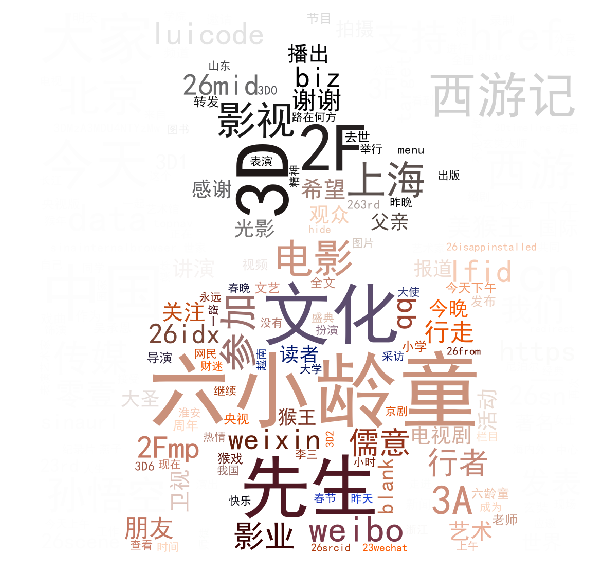

In [258]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1) 

image_colors = ImageColorGenerator(monkey_mask)
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

In [259]:
from jieba import posseg

In [261]:
for weibo in six_weibo_list[:20]:
    words = posseg.cut(weibo)
    for word, flag in words:
        if flag == 'ns':
            print('{} {}'.format(word, flag))

Âåó‰∫¨ ns
Ê≤≥ ns
Á¶èÂª∫ ns
Âπø‰∏ú ns
Â∫ÜÂÖ∏ ns
ÈóΩÂåó ns
ÈóΩË•øÂåó ns
‰∏≠ÂõΩ ns
Â§ßÂú£ ns
Â§ßÂú£ ns
ÊµôÊ±ü ns
Áªç ns
‰∫åÂì• ns
ÂüÉ ns
‰∏≠ÂõΩ ns
ÊµôÊ±ü ns
ÁªçÂÖ¥Â∏Ç ns
Ê≤≥Âåó ns
Âåó‰∫¨ ns
‰∏≠ÂõΩ ns
Âåó‰∫¨ ns
ÈïøÊ±ü ns
Â§ßÂú£ ns
Â§ßÂú£ ns
Â§ßÂú£ ns
Áõ¥Èö∂ ns
Áõ¥Èö∂ ns


In [266]:
places_visited = []

for weibo in tqdm_notebook(six_weibo_list):
    
    words = posseg.cut(weibo)
    places = []
    for word, flag in words:
        if flag == 'ns'and word not in places:
            places.append(word)
    
    places_visited.append(' '.join(places))

In [268]:
mblog_df['places'] = places_visited

In [272]:
'Â§ßÂú£'.split()

['Â§ßÂú£']

In [273]:
places = []

for place in places_visited:
    places.extend(place.split())

In [275]:
place_series = pd.Series(places)

In [283]:
place_series

0         Âåó‰∫¨
1          Ê≤≥
2         Á¶èÂª∫
3         Âπø‰∏ú
4         Â∫ÜÂÖ∏
5         ÈóΩÂåó
6        ÈóΩË•øÂåó
7         ‰∏≠ÂõΩ
8         Â§ßÂú£
9         ÊµôÊ±ü
10         Áªç
11        ‰∫åÂì•
12         ÂüÉ
13        ‰∏≠ÂõΩ
14        ÊµôÊ±ü
15       ÁªçÂÖ¥Â∏Ç
16        Ê≤≥Âåó
17        Âåó‰∫¨
18        ‰∏≠ÂõΩ
19        Âåó‰∫¨
20        ÈïøÊ±ü
21        Â§ßÂú£
22        Áõ¥Èö∂
23        Â§ßÂú£
24        Âåó‰∫¨
25        ÈïøÊ±ü
26        Âé¶Èó®
27        ÂõõÂ∑ù
28        ÈôïË•ø
29        ‰∫ëÂçó
        ... 
6121      ‰∏≠ÂõΩ
6122       ‰∏π
6123      Â§©Ê¥•
6124      ‰∏≠ÂõΩ
6125      Â∞ºÊ≥ä
6126      Áæé‰∏Ω
6127    ÊñáÊòéÂè§ÂõΩ
6128      Â∞ºÊ≥ä
6129      Ë¥µÂõΩ
6130      Â∫ìÈ©¨
6131      ‰∏≠ÂõΩ
6132      ‰∫¨Âüé
6133      Ë•øÂçó
6134      ‰∏äÂè∞
6135      ‰∫åÂì•
6136      Âåó‰∫¨
6137      Ë•øÂüé
6138      ‰∏≠ÂõΩ
6139      Ë•øÂüé
6140      ‰∏≠ÂõΩ
6141      ‰∏≠ÂõΩ
6142      Âª∫ÂõΩ
6143     ÊØîÂà©Êó∂
6144      ‰∏≠ÂõΩ
6145      È©¨Ê¥ã
6146      Â∫ÜÂÖ∏
6147      ‰∫¨Âüé
6148      Âπ≥Â±±

In [278]:
from pyecharts import Map

In [280]:
china_provinces = ['Âåó‰∫¨','Â§©Ê¥•','‰∏äÊµ∑','ÈáçÂ∫Ü','Ê≤≥Âåó','Â±±Ë•ø','ËæΩÂÆÅ','ÂêâÊûó','ÈªëÈæôÊ±ü','Ê±üËãè','ÊµôÊ±ü',
                   'ÂÆâÂæΩ','Á¶èÂª∫','Ê±üË•ø','Â±±‰∏ú','Ê≤≥Âçó','ÊπñÂåó','ÊπñÂçó','Âπø‰∏ú','Êµ∑Âçó','ÂõõÂ∑ù','Ë¥µÂ∑û',
                   '‰∫ëÂçó','ÈôïË•ø','ÁîòËÇÉ','ÈùíÊµ∑','Âè∞Êπæ','ÂÜÖËíôÂè§','ÂπøË•ø','Ë•øËóè','ÂÆÅÂ§è','Êñ∞ÁñÜ',
                   'È¶ôÊ∏Ø','Êæ≥Èó®']

In [284]:
visit_dict = {}

for i in place_series:
    if i in china_provinces:
        visit_dict[i] = place_series.value_counts()[i]

In [285]:
visit_dict

{'Âåó‰∫¨': 413,
 'Á¶èÂª∫': 13,
 'Âπø‰∏ú': 16,
 'ÊµôÊ±ü': 76,
 'Ê≤≥Âåó': 29,
 'ÂõõÂ∑ù': 29,
 'ÈôïË•ø': 66,
 '‰∫ëÂçó': 41,
 'ÂπøË•ø': 2,
 '‰∏äÊµ∑': 301,
 'ÊπñÂåó': 15,
 'ÈáçÂ∫Ü': 46,
 'Â§©Ê¥•': 26,
 'ËæΩÂÆÅ': 32,
 'Ê±üËãè': 56,
 'ÂÜÖËíôÂè§': 46,
 'ÁîòËÇÉ': 20,
 'Âè∞Êπæ': 39,
 'È¶ôÊ∏Ø': 48,
 'ÂêâÊûó': 4,
 'ÂÆâÂæΩ': 55,
 'Êñ∞ÁñÜ': 10,
 'Â±±Ë•ø': 24,
 'Ê≤≥Âçó': 33,
 'Ë¥µÂ∑û': 10,
 'ÈùíÊµ∑': 9,
 'Êµ∑Âçó': 17,
 'ÂÆÅÂ§è': 5,
 'Ê±üË•ø': 17,
 'ÊπñÂçó': 10,
 'Â±±‰∏ú': 61,
 'ÈªëÈæôÊ±ü': 4,
 'Êæ≥Èó®': 2,
 'Ë•øËóè': 1}

In [288]:
value = visit_dict.values()
attr = visit_dict.keys()

In [294]:
six_map = Map('ÂÖ≠Â≠¶Âú∞Âõæ')

In [295]:
six_map.add('ÂÆâÊéí', attr, value, maptype='china',
           is_visualmap=True, is_map_symbol_show=False)

Â••Â≠¶
‰∫¨Â≠¶